# Estimating an AR Model

## Introduction to Autoregression Model

An autoregression model is a regression with a time series and itself, shifted by a time step or steps. These are called lags. 

Autoregressive Models
Autoregressive (AR) Model is when present value of a time series can be predicted from using previous values of the same series. It's a regression using its same series, though shifted by a time step, called a lag. The present value is a weighted average of its past values. Both the t-1 and t-2 are lags of the time series y. The error term (noise) is represented as e. The values a1 and a2 are the coefficients of the model.

AR(1) model: $y_{t}$ = $a_{1}$$y_{t-1}$ + $e_{t}$

AR(2) model: $y_{t}$ = $a_{1}$$y_{t-1}$ + $a_{2}$$y_{t-2}$ + $e_{t}$

In [4]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###  Example 1: Vacation dataset

In [5]:
# Read in vacation dataset
vacation = pd.read_csv('df_vacation.csv', index_col=0, parse_dates=True)
vacation.head()

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86
2004-04-01,79
2004-05-01,89


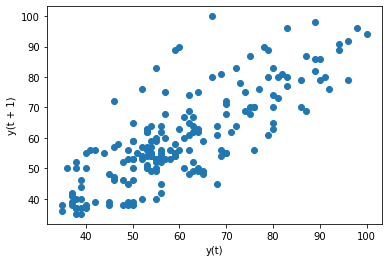

In [6]:
# Plot the time series against its lag
lag_plot(vacation)
pyplot.show()

In [7]:
from pandas import concat

values = pd.DataFrame(vacation.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.797406
t+1  0.797406  1.000000


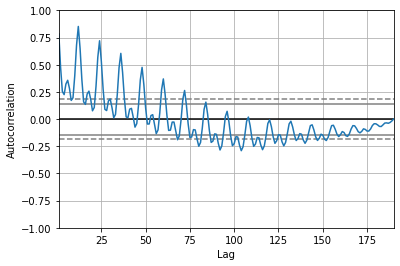

In [8]:
# Plot the autocorrelation of the dataset
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(vacation)
pyplot.show()

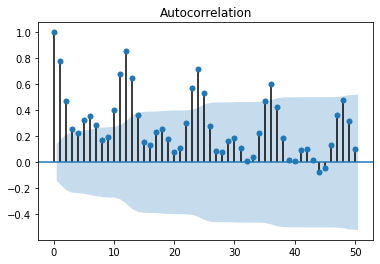

In [9]:
# Plot the Autocorrelation Function, using candle sticks

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(vacation, lags=50)
pyplot.show()

In [10]:
# Estimating an AR Model

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(vacation, order=(1,0))  # fit data to an AR1 model
res = mod.fit()  # use fit() to estimate model

# Print out summary information on the fit
print(res.summary())

print(res.params)
# Estimated parameters are close to true parameters

                               ARMA Model Results                              
Dep. Variable:     Num_Search_Vacation   No. Observations:                  190
Model:                      ARMA(1, 0)   Log Likelihood                -694.604
Method:                        css-mle   S.D. of innovations              9.338
Date:                 Fri, 17 Apr 2020   AIC                           1395.209
Time:                         11:05:13   BIC                           1404.950
Sample:                     01-01-2004   HQIC                          1399.155
                          - 10-01-2019                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        60.4397      3.451     17.512      0.000      53.675      67.204
ar.L1.Num_Search_Vacation     0.8079      0.044     18.352      0.000       0.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


The best model chosen is the one with the lowest Information Criterion.  The AIC shows the lowest.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


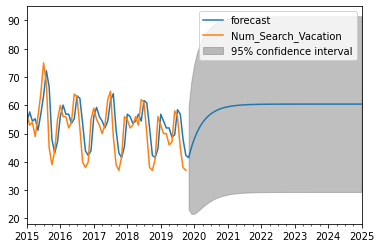

In [11]:
# Forecasting
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(vacation, order=(1,0))
res = mod.fit()

# Start the forecast 10 data points before the end of the  point series at , 
#and end the forecast 10 data points after the end of the series at point 
res.plot_predict(start='2015', end='2025')
pyplot.show()

###  Example 2: Furniture dataset

In [12]:
furn = read_csv('df_furniture.csv', index_col=0, parse_dates=True)
furn.head()

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618


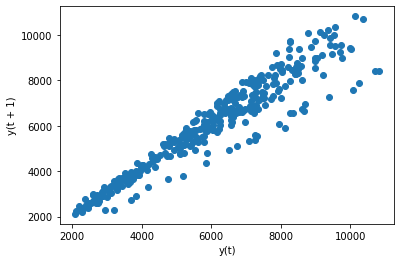

In [13]:
# Plot the time series against its lag
lag_plot(furn)
pyplot.show()

In [14]:
from pandas import concat

values = pd.DataFrame(furn.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.951005
t+1  0.951005  1.000000


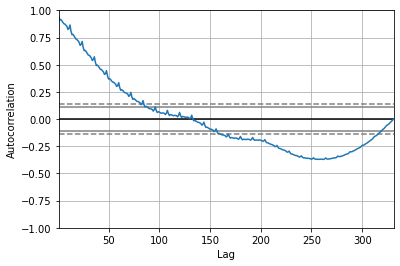

In [15]:
# Plot the autocorrelation
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(furn)
pyplot.show()

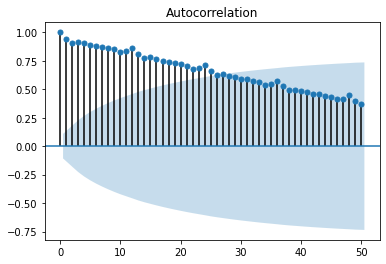

In [16]:
# Plot the Autocorrelation Function, using candle sticks
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(furn, lags=50)
pyplot.show()

In [17]:
# Estimating an AR Model

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(furn, order=(1,0))  # fit data to an AR1 model
res = mod.fit()  # use fit() to estimate model

# Print out summary information on the fit
print(res.summary())

print(res.params)
# Estimated parameters are close to true parameters

# S.D. of innovations is standard deviation of errors
# L1 is lag1
# fitted model parameters

                                 ARMA Model Results                                 
Dep. Variable:     furniture_price_adjusted   No. Observations:                  331
Model:                           ARMA(1, 0)   Log Likelihood               -2612.843
Method:                             css-mle   S.D. of innovations            646.182
Date:                      Fri, 17 Apr 2020   AIC                           5231.687
Time:                              11:11:09   BIC                           5243.093
Sample:                          01-01-1992   HQIC                          5236.236
                               - 07-01-2019                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           5976.5737    788.950      7.575      0.000    4430.261    7522.887
ar.L1.furniture_price_a

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


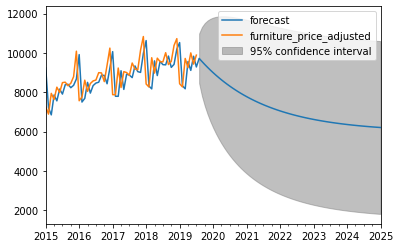

In [18]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(furn, order=(1,0))
res = mod.fit()


# Start the forecast 10 data points before the end of the  point series at , 
#and end the forecast 10 data points after the end of the series at point 
res.plot_predict(start='2015', end='2025')
pyplot.show()

###  Example 3: Bank of America dataset

In [21]:
# Read in BOA dataset, this is original with resampling to monthly data
bac= read_csv('df_bac.csv', index_col=0, parse_dates=True)
# convert daily data to monthly
bac= bac.resample(rule='M').last()
bac.head()

,Adj Close Price
Date,
1990-01-31,1.542054
1990-02-28,1.687537
1990-03-31,1.469485
1990-04-30,1.441042
1990-05-31,1.525887


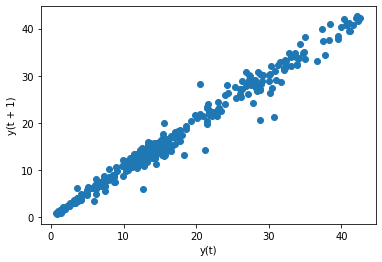

In [22]:
# Plot the time series against its lag
lag_plot(bac)
pyplot.show()

In [23]:
from pandas import concat

values = pd.DataFrame(bac.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.989824
t+1  0.989824  1.000000


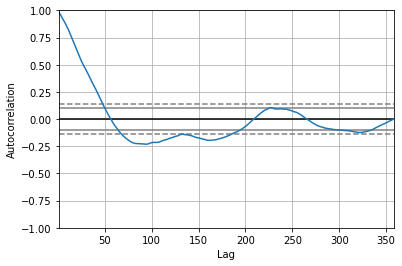

In [24]:
# Plot the autocorrelation
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(bac)
pyplot.show()

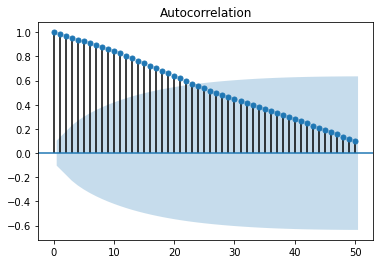

In [25]:
# Plot the Autocorrelation Function, using candle sticks
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(bac, lags=50)
pyplot.show()

In [26]:
# Estimating an AR Model

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(bac, order=(1,0))  # fit data to an AR1 model
res = mod.fit()  # use fit() to estimate model

# Print out summary information on the fit
print(res.summary())

print(res.params)
# Estimated parameters are close to true parameters

# S.D. of innovations is standard deviation of errors
# L1 is lag1
# fitted model parameters

                              ARMA Model Results                              
Dep. Variable:        Adj Close Price   No. Observations:                  358
Model:                     ARMA(1, 0)   Log Likelihood                -668.617
Method:                       css-mle   S.D. of innovations              1.557
Date:                Fri, 17 Apr 2020   AIC                           1343.234
Time:                        11:11:49   BIC                           1354.876
Sample:                    01-31-1990   HQIC                          1347.864
                         - 10-31-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    16.1768      7.402      2.185      0.030       1.668      30.685
ar.L1.Adj Close Price     0.9913      0.006    153.824      0.000       0.979       1.004
        

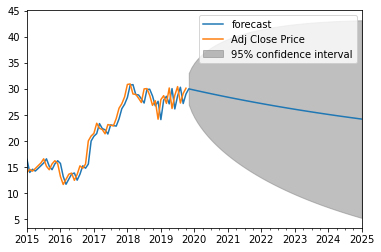

In [27]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(bac, order=(1,0))
res = mod.fit()

# Start the forecast 10 data points before the end of the  point series at , 
#and end the forecast 10 data points after the end of the series at point 
res.plot_predict(start='2015', end='2025')
pyplot.show()

###  Example 4: Average Temperature of St. Louis dataset

In [35]:
# Read in temp dataset
temp = read_csv('df_temp.csv', index_col=0, parse_dates=True)
temp.head()

,Value
Date,
1938-04-01,56.5
1938-05-01,64.7
1938-06-01,73.5
1938-07-01,80.4
1938-08-01,81.3


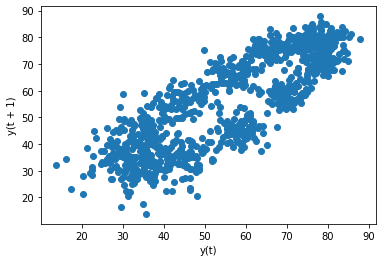

In [36]:
# Plot the time series against its lag
lag_plot(temp)
pyplot.show()

In [37]:
from pandas import concat

values = pd.DataFrame(temp.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)


          t-1       t+1
t-1  1.000000  0.833097
t+1  0.833097  1.000000


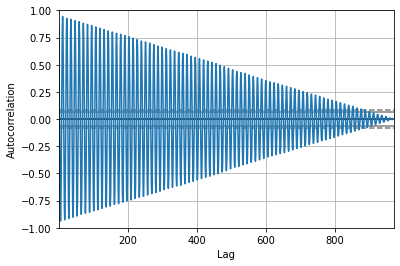

In [38]:
# Plot the autocorrelation
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(temp)
pyplot.show()

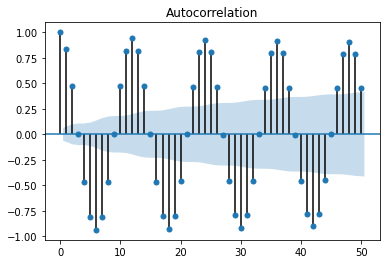

In [39]:
# Plot the Autocorrelation Function, using candle sticks
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(temp, lags=50)
pyplot.show()

In [40]:
# Estimating an AR Model

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(temp, order=(1,0))  # fit data to an AR1 model
res = mod.fit()  # use fit() to estimate model

# Print out summary information on the fit
print(res.summary())

print(res.params)
# Estimated parameters are close to true parameters

# S.D. of innovations is standard deviation of errors
# L1 is lag1
# fitted model parameters

                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                  970
Model:                     ARMA(1, 0)   Log Likelihood               -3580.547
Method:                       css-mle   S.D. of innovations              9.696
Date:                Fri, 17 Apr 2020   AIC                           7167.095
Time:                        11:12:38   BIC                           7181.727
Sample:                    04-01-1938   HQIC                          7172.664
                         - 01-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          56.3191      1.857     30.336      0.000      52.680      59.958
ar.L1.Value     0.8332      0.018     46.994      0.000       0.798       0.868
                                    Roots       

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


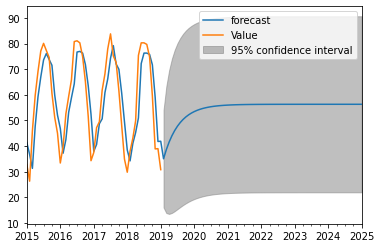

In [41]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(temp, order=(1,0))
res = mod.fit()


# Start the forecast 10 data points before the end of the  point series at , 
#and end the forecast 10 data points after the end of the series at point 
res.plot_predict(start='2015', end='2025')
pyplot.show()

In [0]:
# end